In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.spatial import distance
import copy
from multiprocessing import Pool

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


In [139]:
gdict = {
            "AaCas12b":"AaCas12b_gRNA",
            "AkCas12b":"Ak_gRNA",
            "AsCas12a":"As_crRNA",
            "BvCas12b":"Bv_gRNA",
            "Cas14a1":"Cas14a1_gRNA",
            "CasRx":"CasRx_crRNA",
            "CdCas9":"Cd_gRNA",
            "CjCas9":"Cj_gRNA",
            "ClCas9":"Cl_gRNA",
            "FnCas12a":"Fn_crRNA",
            "FnCas9":"Fn_gRNA",
            "L7Ae":"BoxCD",
            "LbCas12a":"Lb_crRNA",
            "MS2CP(V29I)":"scMS2(WTx2)",
            "MbCas12a":"Mb_crRNA",
            "NcCas9":"Nc_gRNA",
            "NmCas9":"Nm_gRNA_v7",
            "No triiger":"No aptamer",
            "PP7CP":"scPP7(WTx2)",
            "PguCas13b":"Pgu_crRNA",
            "PlCas9":"Pl_gRNA",
            "PlmCasX":"PlmCasX_crRNA",
            "PspCas13b":"Psp_crRNA",
            "RanCas13b":"Ran_crRNA",
            "SaCas9":"Sa_gRNA",
            "SpCas9":"Sp_gRNA",
            "SpaCas9":"Spa_gRNA",
            "St1Cas9":"St1_gRNA",
            "St3Cas9":"St3_gRNA"}

drop_genes       = ["No triiger", "PP7CP", "L7Ae", "MS2CP(V29I)", "RanCas13b", "AsCas12a", "AaCas12b", "St1Cas9", "SpaCas9"]
drop_aptamers = [gdict[p] for p in drop_genes] + ["Nm_gRNA"]

necessary_genes = ["PspCas13b", "PguCas13b", "SaCas9"]


df0 = pd.read_excel("../datasets/Orthogonal OFF-3.xlsx", index_col = 0, sheet_name=0).drop(labels = drop_genes,axis= 0).drop(labels = drop_aptamers, axis= 1)** -1
df1 = pd.read_excel("../datasets/Orthogonal OFF-3.xlsx", index_col = 0, sheet_name=1).drop(labels = drop_genes,axis= 0).drop(labels = drop_aptamers, axis= 1)** -1
df2 = pd.read_excel("../datasets/Orthogonal OFF-3.xlsx", index_col = 0, sheet_name=2).drop(labels = drop_genes,axis= 0).drop(labels = drop_aptamers, axis= 1)** -1
df = (df0 + df1 + df2)/3
df

,Sp_gRNA,Sa_gRNA,Cj_gRNA,Fn_gRNA,Cd_gRNA,Cl_gRNA,Pl_gRNA,Nc_gRNA,St3_gRNA,Fn_crRNA,Lb_crRNA,Mb_crRNA,Ak_gRNA,Bv_gRNA,Psp_crRNA,Pgu_crRNA,CasRx_crRNA,PlmCasX_crRNA,Cas14a1_gRNA,Nm_gRNA_v7
Normalized2,,,,,,,,,,,,,,,,,,,,
SpCas9,24.131197,1.146943,1.162100,1.198282,1.363316,1.043135,0.968362,1.217529,11.341384,1.031328,1.471013,1.041417,0.990161,0.956357,1.316420,1.093326,1.230120,0.867707,0.976472,1.106130
SaCas9,1.166859,17.004156,1.125098,1.164570,1.056804,1.091671,1.027699,0.997617,1.057647,1.092555,1.133570,1.159295,0.960492,0.987471,1.195113,1.180024,0.969526,0.798036,1.255248,1.520191
CjCas9,1.134269,1.189191,10.715687,1.087075,0.949220,1.971760,0.961305,0.833721,1.046675,1.025841,1.151980,1.041101,1.002661,0.952238,1.161764,1.102160,0.963972,0.681172,1.025763,1.037257
NmCas9,1.119204,1.158848,1.182086,1.254170,1.204445,1.163758,0.902672,3.039941,0.933821,1.081634,1.134550,1.471686,1.384509,1.171191,0.981958,1.458738,1.087111,0.953434,0.971720,3.953683
FnCas9,1.154025,1.059005,1.157203,15.765383,1.124434,1.054094,1.166909,1.202844,1.114723,1.031112,1.089093,1.135195,1.095715,1.223047,1.206648,1.124270,0.996482,0.800500,1.120206,2.052760
CdCas9,1.308967,0.838315,1.073214,1.415804,1.928724,1.007207,0.934022,1.067043,1.099146,1.025210,1.197373,0.951370,0.893389,0.868701,1.258562,1.348192,1.079219,0.749475,0.939462,1.024646
ClCas9,1.135119,1.752754,3.843237,1.528623,1.645346,2.624266,1.290252,1.455681,0.994723,1.081736,1.307976,1.542636,1.205475,1.379628,1.116351,1.208684,1.105218,0.991730,0.966689,1.211892
PlCas9,1.540237,1.474557,1.710002,2.174576,1.881195,1.174754,1.344701,1.704156,2.200092,1.160514,5.175645,1.092089,1.407874,1.348363,1.588330,1.546301,1.389047,1.227274,1.235475,1.331909
NcCas9,1.293827,1.328458,1.141206,1.075525,1.038005,1.078818,0.943347,4.699050,1.060889,0.997480,1.033528,0.990968,0.896187,1.103003,1.059501,1.040236,0.990612,0.702988,1.016818,4.659361


In [81]:
# 対点の距離の最小値を計算する. 


# def calc_min_intradist(p_list):
#     def dist(pa,pb):
#         d = distance.cosine(df.loc[pa], df.loc[pb])
#         return d

#     min_dist = float("inf")
#     for i in range(len(p_list)):
#         for j in range(len(p_list)):
#             if i > j:
#                 d = dist(p_list[i], p_list[j])
#                 if d < min_dist:
#                     min_dist = d
#     return min_dist

# for comb in combinations(df.index.values, 2):
#     print(calc_min_intradist(comb))

In [140]:
from itertools import combinations
from multiprocessing import Pool, get_context


def calc_min_intradist(p_list):
    state = df[[gdict[gene] for gene in p_list]].loc[p_list]
    # print(state)
    
    def dist(state, pa,pb):
        d = distance.cosine(state.loc[pa], state.loc[pb])
        return d

    min_dist = float("inf")
    for i in range(len(p_list)):
        for j in range(len(p_list)):
            if i > j:
                d = dist(state, p_list[i], p_list[j])
                if d < min_dist:
                    min_dist = d
    return p_list, min_dist


def calc_min_intradist_m1(p_list):
    state = df[[gdict[gene] for gene in p_list]].loc[p_list] - 1
    # print(state)
    
    def dist(state, pa,pb):
        d = distance.cosine(state.loc[pa], state.loc[pb])
        return d

    min_dist = float("inf")
    for i in range(len(p_list)):
        for j in range(len(p_list)):
            if i > j:
                d = dist(state, p_list[i], p_list[j])
                if d < min_dist:
                    min_dist = d
    return p_list, min_dist



calc_min_intradist_m1(["PspCas13b", "PguCas13b"])

(['PspCas13b', 'PguCas13b'], 0.9884033728401064)

In [141]:
calc_min_intradist(df.index[:4])

(Index(['SpCas9', 'SaCas9', 'CjCas9', 'NmCas9'], dtype='object', name='Normalized2'),
 0.59756061037209)

In [142]:
def generate_combi(genes, N_PROTEINS):
    genes_candidate = copy.copy(list(genes))
    # necessary_genes = ["PspCas13b", "PguCas13b", "SaCas9"]
    necessary_genes = ["PspCas13b", "PguCas13b"]
    for ng in necessary_genes:
        genes_candidate.remove(ng)
    return [necessary_genes + list(others) for others in combinations(genes_candidate, N_PROTEINS-len(necessary_genes))]


def get_best(res_dist):
    best_combi = ()
    best_score = 0
    for c, s in res_dist:
        if s > best_score:
            best_combi = c
            best_score = s
    return best_combi, best_score


generate_combi(df.index, 4)[:10]

[['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'CjCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'NmCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'FnCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'CdCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'ClCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'PlCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'NcCas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'St3Cas9'],
 ['PspCas13b', 'PguCas13b', 'SpCas9', 'FnCas12a']]

In [143]:
%%time 

with get_context("fork").Pool(5) as p:
    res_dist = p.map(
        calc_min_intradist,
        generate_combi(df.index.values, 8)
    )
get_best(res_dist)

CPU times: user 52.7 ms, sys: 79.7 ms, total: 132 ms
Wall time: 12.9 s


(['PspCas13b',
  'PguCas13b',
  'SpCas9',
  'SaCas9',
  'FnCas9',
  'LbCas12a',
  'AkCas12b',
  'CasRx'],
 0.8419466430007636)

In [145]:
log_best_combi = dict()

for N_PROTEINS in range(3, 18):
    with get_context("fork").Pool(5) as p:
        res_dist = p.map(
            calc_min_intradist,
            generate_combi(df.index.values, N_PROTEINS)
        )
        p.close()
        
    log_best_combi[N_PROTEINS] = get_best(res_dist)
    print(N_PROTEINS, get_best(res_dist))

3 (['PspCas13b', 'PguCas13b', 'LbCas12a'], 0.9269521806235963)
4 (['PspCas13b', 'PguCas13b', 'SpCas9', 'MbCas12a'], 0.8953683334631292)
5 (['PspCas13b', 'PguCas13b', 'SpCas9', 'LbCas12a', 'CasRx'], 0.8851367542891146)
6 (['PspCas13b', 'PguCas13b', 'SpCas9', 'MbCas12a', 'AkCas12b', 'CasRx'], 0.8740894139921794)
7 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'LbCas12a', 'AkCas12b', 'CasRx'], 0.8614521092340376)
8 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'FnCas9', 'LbCas12a', 'AkCas12b', 'CasRx'], 0.8419466430007636)
9 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'CjCas9', 'FnCas9', 'MbCas12a', 'AkCas12b', 'CasRx'], 0.7880814411365872)
10 (['PspCas13b', 'PguCas13b', 'SaCas9', 'CjCas9', 'FnCas9', 'St3Cas9', 'MbCas12a', 'AkCas12b', 'CasRx', 'Cas14a1'], 0.7063309435605476)
11 (['PspCas13b', 'PguCas13b', 'SaCas9', 'CjCas9', 'FnCas9', 'St3Cas9', 'FnCas12a', 'AkCas12b', 'BvCas12b', 'CasRx', 'Cas14a1'], 0.6384865915309041)
12 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'CjCas9',

In [146]:
log_best_combi_m1 = dict()

for N_PROTEINS in range(3, 18):
    with get_context("fork").Pool(5) as p:
        res_dist = p.map(
            calc_min_intradist_m1,
            generate_combi(df.index.values, N_PROTEINS)
        )
        p.close()
        
    log_best_combi_m1[N_PROTEINS] = get_best(res_dist)
    print(N_PROTEINS, get_best(res_dist))

3 (['PspCas13b', 'PguCas13b', 'MbCas12a'], 0.9883751022676787)
4 (['PspCas13b', 'PguCas13b', 'SaCas9', 'MbCas12a'], 0.9873157032109814)
5 (['PspCas13b', 'PguCas13b', 'SaCas9', 'FnCas9', 'MbCas12a'], 0.9838493524166163)
6 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'FnCas9', 'MbCas12a'], 0.9807369044976523)
7 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'FnCas9', 'MbCas12a', 'BvCas12b'], 0.9740819472454509)
8 (['PspCas13b', 'PguCas13b', 'SpCas9', 'CjCas9', 'FnCas9', 'MbCas12a', 'BvCas12b', 'CasRx'], 0.9723736077351652)
9 (['PspCas13b', 'PguCas13b', 'SpCas9', 'SaCas9', 'CjCas9', 'FnCas9', 'MbCas12a', 'BvCas12b', 'CasRx'], 0.9721245023939438)
10 (['PspCas13b', 'PguCas13b', 'SaCas9', 'CjCas9', 'FnCas9', 'NcCas9', 'St3Cas9', 'MbCas12a', 'BvCas12b', 'CasRx'], 0.9110303256469852)
11 (['PspCas13b', 'PguCas13b', 'SaCas9', 'CjCas9', 'FnCas9', 'NcCas9', 'St3Cas9', 'LbCas12a', 'BvCas12b', 'CasRx', 'Cas14a1'], 0.8689044306427869)
12 (['PspCas13b', 'PguCas13b', 'SaCas9', 'CjCas9', 'FnCas9', '

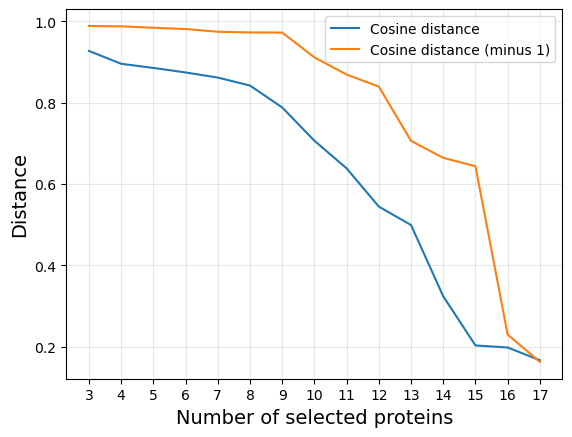

In [150]:
plt.plot(range(3, 18), [dublet[1] for n, dublet in log_best_combi.items()], label = "Cosine distance")
plt.plot(range(3, 18), [dublet[1] for n, dublet in log_best_combi_m1.items()], label = "Cosine distance (minus 1)")
plt.grid(alpha = 0.3)
plt.xticks(range(3,18))
plt.xlabel("Number of selected proteins", fontsize = 14)
plt.ylabel("Distance", fontsize = 14)
plt.legend()
plt.savefig("../outputs/distance_nmembers.pdf", transparent = True, dpi = 300)
plt.savefig("../outputs/distance_nmembers.png", transparent = True, dpi = 300)

In [160]:
# n_members = 15


# for n_members in range(3,18):

#     genes = log_best_combi_m1[n_members][0]

#     sns.clustermap(
#         df[[gdict[gene] for gene in genes]].loc[genes],
#         cmap = "GnBu",
#         col_cluster=True,
#         row_cluster = True, 
#         linecolor = "0.95",
#         linewidth=0.1,
#         cbar_kws={"orientation": "vertical", "shrink":0.40, "aspect":40, "label": "Fold change"}
#     )


#     plt.savefig(f"../outputs/cosine_distance_m1_{n_members}members.png", dpi = 300)
#     plt.savefig(f"../outputs/cosine_distance_m1_{n_members}members.pdf", dpi = 300)
    
    
#     genes = log_best_combi[n_members][0]

#     sns.clustermap(
#         df[[gdict[gene] for gene in genes]].loc[genes],
#         cmap = "GnBu",
#         col_cluster=True,
#         row_cluster = True, 
#         linecolor = "0.95",
#         linewidth=0.1,
#         cbar_kws={"orientation": "vertical", "shrink":0.40, "aspect":40, "label": "Fold change"}
#     )


#     plt.savefig(f"../outputs/cosine_distance_{n_members}members.png", dpi = 300)
#     plt.savefig(f"../outputs/cosine_distance_{n_members}members.pdf", dpi = 300)

In [135]:
[gdict[gene] for gene in genes]

['Psp_crRNA',
 'Pgu_crRNA',
 'Sa_gRNA',
 'Cj_gRNA',
 'Fn_gRNA',
 'Ak_gRNA',
 'Nc_gRNA',
 'St3_gRNA',
 'Fn_crRNA',
 'Lb_crRNA',
 'Ak_gRNA',
 'Bv_gRNA',
 'CasRx_crRNA',
 'PlmCasX_crRNA',
 'Cas14a1_gRNA']